In [14]:
import os
import getpass

api_key = getpass.getpass("Enter OPENAI_API_KEY: ")
os.environ['OPENAI_API_KEY'] = api_key

/opt/anaconda3/envs/dhlab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


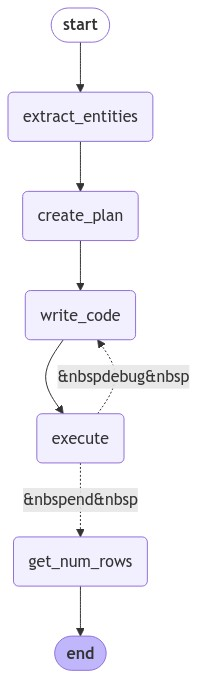

In [1]:
from IPython.display import Image, display
from agent import graph
from utils.utils import extract_content

# Visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
import pandas as pd

# Read Sample question
questions = pd.read_csv('data/questions_sql.csv')
sample_question = questions.iloc[0]

print(sample_question['question'])

Specify all the property types that are encapsulated in the dataset.


In [20]:
from utils.utils import get_openai_llm

# Initialize the OpenAI model
llm = get_openai_llm(seed=42)

In [21]:
# Run the graph
final_state = graph.invoke({
    "llm": llm,
    "question": sample_question['question'],
    "answer_format": sample_question['answer_format'],
    "num_steps": 0
})

In [22]:
print('*** References ***')
print(final_state['references'], end='\n\n')

print('*** Entities ***')
print(final_state['entities'], end='\n\n')

print('*** Plan ***')
print(final_state['plan'], end='\n\n')

print('*** Code ***')
print(final_state['code'], end='\n\n')

print('*** Answer ***', end='\n\n')
print(final_state['code_output'], end='\n\n')

print('*** Information Score ***')
print(final_state['num_rows'], end='\n\n')

*** References ***
[{'property types': {'dataset': 'data/buildings_1740.csv', 'column': 'building_functions'}}, {'property types': {'dataset': 'data/buildings_1808.csv', 'column': 'building_functions'}}]

*** Entities ***
[]

*** Plan ***
1. **Identify the Relevant Datasets**: We need to focus on the two datasets mentioned in the references: the 1740 Buildings Dataset and the 1808 Buildings Dataset. Both datasets contain information about the functions of buildings, which we refer to as property types.

2. **Extract Building Functions from 1740 Dataset**: 
   - Open the 1740 Buildings Dataset.
   - Locate the column labeled 'building_functions'.
   - Extract all unique values from this column to identify the different functions that buildings served in 1740.

3. **Extract Building Functions from 1808 Dataset**: 
   - Open the 1808 Buildings Dataset.
   - Locate the column labeled 'building_functions'.
   - Extract all unique values from this column to identify the different functions t

In [23]:
print("Answer: ", extract_content(final_state['code_output']))
print("Information Score: ", extract_content(final_state['num_rows']))

Answer:  corto, forno, magazzeno, casetta, macello, corto, palazzo, bottega, casa, volta, palazzo, bottega, casa, corto, locale, casa, orto, bottega, casa, orto, stanza, appartamento, luogo, locale, osteria, bottega, casa, corto, casa, locanda, casa, corto, magazzeno, bottega, casotto, casa, corto, fabbrica, tintoria, terreno, loggia, casa, corto, portico, casa, stanza, chiesa, casotto, casa, corto, giardino, portico, casa, corto, forno, bottega, casa, corto, magazzeno, osteria, bottega, corto, locale, corto, portico, locale, teatro, bottega, locale, bottega, porta, stabile, bottega, casa, corto, fabbrica, bottega, camera, casa, luogo, teatro, casa, locale, scuola, bottega, caffe, locale, bottega, palazzo, casa, corto, squero, bottega, magazzeno, casino, fabbrica, locale, casa, corto, orto, cavana, locanda, casa, corto, magazzeno, vendivino, casa, giardino, appartamento, casa, forno, casa, loggia, casa, casetta, corto, casa, magazzeno, casa, corto, fabbrica, bottega, casa, corto, magaz